<center><img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-color.svg" height="100" /></center>

****

# Examples for julia

### Bubble Sort

A basic sorting algorithm.

Takes an input array, index $1,...,n$, then sorts the elemnts smallesr to largest by allowing the larger elemnts, or "bubble".


In [3]:
function bubbleSort!(a)
    n = length(a)
    for i in 1:n-1
        for j in 1: n-i
            if a[j] > a[j+1]
                a[j], a[j+1] = a[j+1], a[j]
            end
        end
    end
    return a
end
data = rand(10)
bubbleSort!(data)
#already have sort function

10-element Array{Float64,1}:
 0.0646584805235948
 0.20867367646380575
 0.24025696818919218
 0.3592554770136631
 0.38382528060811794
 0.4059452647713713
 0.4209877367247261
 0.6288482011567202
 0.6927375585154096
 0.9469243052004841

### Roots of a Polynomial

Consider the polynomial

$$
f(x) = a_nx^n + a_{n-1}x^{n-1} + ...+ a_1x + a_0
$$

with real-valued coefficients $a_0, ...a_n$.find all $x$ values that solve the equation $f(x)=0$.


In [4]:
using Roots
function polynomialGenerator(a...)
    n = length(a) - 1
    poly = function(x)
				return sum([a[i+1] * x^i for i in 0:n])
			end
	return poly
end

polynomial = polynomialGenerator(1,3,-10)
zeroVals = find_zeros(polynomial,-10,10)
println("Zeros of the function f(x): ", zeroVals)

Zeros of the function f(x): [-0.19999999999999998, 0.5]


### Markov Chain

1. By raising the Matrix $P$ to a high power, the limiting distribution is obtained in any row.$\pi_i = lim_{n \to \infty}[P^n]_{i,j}$ for any index, $j$.

```julia
P = [0.5 0.4 0.1;
	 0.3 0.2 0.5;
	 0.5 0.3 0.2]

res1 = (P^100)[1, :]
```

2. We solve the linear systerm of equations,$\pi P = \pi$ and $\sum_{i=1}^{3} \pi_i = 1$

```julia
A = vcat((P' - I)[1:2, :], ones(3)')
b = [0 0 1]'
res2 = A\b
```

### Web,JSON and String Process

The **JSON** format uses '{}' characters to enclose a hierarchical nested structure of key value pairs.
```julia
using HTTP, JSON
data = HTTP.request("GET", "https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt")
shakespeare = String(data.body)
shakespeareWords = split(shakespeare)

jsonWords = HTTP.request("GET", "https://raw.githubusercontent.com/"*
"h-Klok/StatsWithJuliaBook/master/1_chapter/jsonCode.json")
parsedJsonDict = JSON.parse(String(jsonWords.body))

keywords = Array{STring}(parsedJsonDict["words"])

numberToSHow = parsedJsonDict["numToShow"])

wordCount = Dict([(x, count(w -> lowrcase(w) == lowercase(x), shakespeareWords)) for x in keywords])
sortedWordCount = sort(collect(wordCount),by=last,rev=true)
sortedWordCount[1:numberToShow]

```

### Basic Plotting

you can visit the website[http://docs.juliaplots.org/](http://docs.juliaplots.org/), to get more information about plots


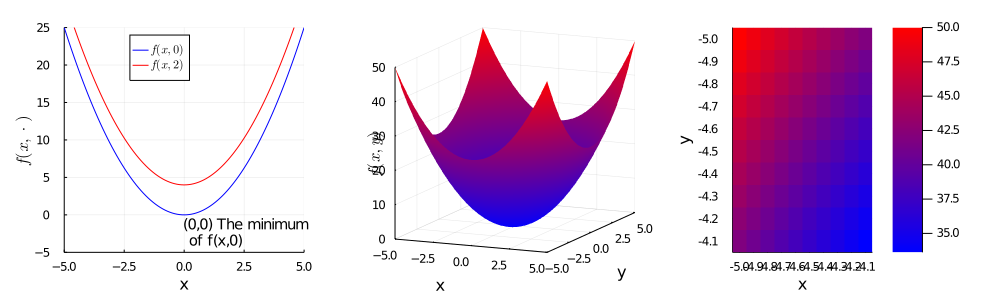

In [10]:
using Plots, LaTeXStrings, Measures
gr()
f(x,y) = x^2 + y^2
f0(x) = f(x,0)
f2(x) = f(x,2)
xVals, yVals = -5:0.1:5 , -5:0.1:5
plot(xVals, [f0.(xVals), f2.(xVals)],c=[:blue :red], xlims=(-5,5), legend=:top,
    ylims=(-5,25), ylabel=L"f(x,\cdot)", label=[L"f(x,0)" L"f(x,2)"])
p1 = annotate!(0, -0.2, text("(0,0) The minimum\n of f(x,0)", :left, :top, 10))
z=[f(x,y) for y in yVals, x in xVals]
p2 = surface(xVals, yVals, z, c=cgrad([:blue, :red]),legend=:none,
    ylabel="y", zlabel=L"f(x,y)")
M = z[1:10,1:10]
p3 = heatmap(M, c=cgrad([:blue, :red]), yflip=true, ylabel="y",
    xticks=([1:10;], xVals), yticks=([1:10;], yVals))
plot(p1, p2, p3, layout=(1,3), size=(1000,300), xlabel="x", margin=5mm)

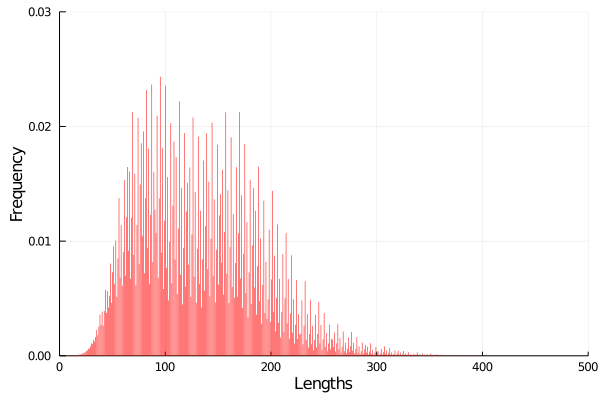

In [17]:
function haiLength(x::Int)
    n = 0
    while x != 1
        if x % 2 == 0
            x = Int(x/2)
        else
            x = 3x+1
        end
        n += 1
    end
    return n
end

lengths = [haiLength(x0) for x0 in 2:10^6]

histogram(lengths, bins=1000, normed=:true, 
    fill=(:red,true), la=0, legend=:none, xlim=(0, 500), ylim=(0, 0.03), 
    xlabel="Lengths", ylabel="Frequency")

┌ Info: Saved animation to 
│   fn = /Users/zhouzhuofei/juliaDL/Statistics/Graphexp.gif
└ @ Plots /Users/zhouzhuofei/.julia/packages/Plots/w4QRq/src/animation.jl:104


Plots.AnimatedGif("/Users/zhouzhuofei/juliaDL/Statistics/Graphexp.gif")
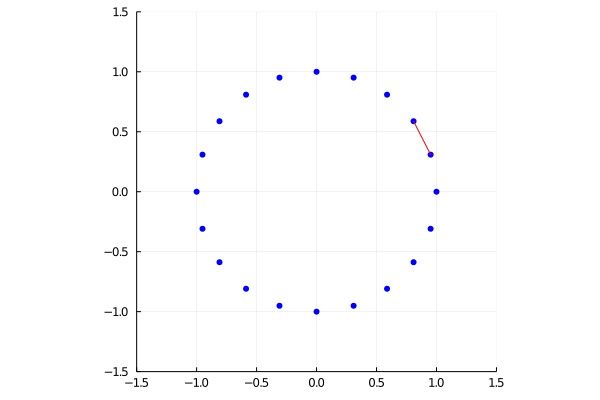

In [21]:
function graphCreator(n::Int)
    vertices = 1:n
    complexPts = [exp(2*pi*im*k/n) for k in vertices]
    coords = [(real(p), imag(p)) for p in complexPts]
    xPts = first.(coords)
    yPts = last.(coords)
    edges = []
    for v in vertices, u in (v+1):n
        push!(edges, (v,u))
    end
    anim  = Animation()
    scatter(xPts, yPts, c=:blue, msw=0, ratio=1,
        xlim=(-1.5, 1.5), ylim=(-1.5,1.5), leg=:none)
    for i in 1:length(edges)
        u, v = edges[i][1], edges[i][2]
        xpoints = [xPts[u], xPts[v]]
        ypoints = [yPts[u], yPts[v]]
        plot!(xpoints, ypoints, lines=:red)
        frame(anim)
    end
    gif(anim, "Graphexp.gif", fps=60)
end
graphCreator(20)

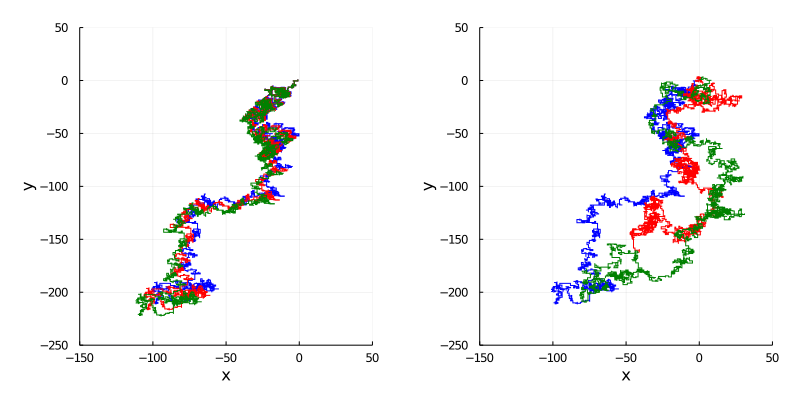

In [26]:
using Random
function path1(rng, alpha, n=5000)
    x, y = 0.0, 0.0
    xDat, yDat = [], []
    for _ in 1:n
        flip = rand(rng, 1:4)
        if flip == 1
             x += 1
        elseif flip == 2
            y += 1
        elseif flip == 3
            x -= (2+alpha)*rand(rng)
        elseif flip == 4
            y -= (2+alpha)*rand(rng)
        end
        push!(xDat, x)
        push!(yDat, y)
    end
    return xDat, yDat
end
alphaRange = [0.2, 0.21, 0.22]
default(xlabel = "x", ylabel = "y", xlims=(-150,50), ylims=(-250,50))
p1 = plot(path1(MersenneTwister(27), alphaRange[1]), c=:blue)
p1 = plot!(path1(MersenneTwister(27), alphaRange[2]), c=:red)
p1 = plot!(path1(MersenneTwister(27), alphaRange[3]), c=:green)

rng = MersenneTwister(27)
p2 = plot(path1(rng, alphaRange[1]), c=:blue)
p2 = plot!(path1(rng, alphaRange[2]), c=:red)
p2 = plot!(path1(rng, alphaRange[3]), c=:green)

plot(p1, p2, size=(800, 400), legend=:none, margin=5mm)
